In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics._scorer import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import paired_distances
import csv
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
import matplotlib as mpl
from sklearn.model_selection import train_test_split


In [11]:
df = pd.read_csv('development.csv', sep=',')
df_forPCA = df.copy()

In [12]:
def custom_loss_func(ground_truth, predictions):
    return np.sum(paired_distances(ground_truth, predictions))/len(ground_truth)

Statistical Feature Analysis 

In [13]:
pmax = [f'pmax[{i}]' for i in range(18)]
means = df[pmax].mean(axis=0)
std = df[pmax].std(axis=0)
display(means)
display(std)

pmax[0]       4.866423
pmax[1]      16.510543
pmax[2]       8.784017
pmax[3]      26.457888
pmax[4]      14.947826
pmax[5]      39.333002
pmax[6]      14.907669
pmax[7]       4.849883
pmax[8]      20.503279
pmax[9]      12.505530
pmax[10]     37.827489
pmax[11]     22.118955
pmax[12]      4.872721
pmax[13]     41.233983
pmax[14]     16.656853
pmax[15]    104.181567
pmax[16]    608.650804
pmax[17]    609.060121
dtype: float64

pmax[0]      1.481220
pmax[1]     16.781018
pmax[2]      7.692692
pmax[3]     25.397517
pmax[4]     13.394484
pmax[5]     27.899214
pmax[6]     16.613431
pmax[7]      1.487651
pmax[8]     20.175681
pmax[9]     13.862611
pmax[10]    30.010446
pmax[11]    21.599092
pmax[12]     1.748889
pmax[13]    27.992784
pmax[14]    17.784631
pmax[15]    16.031714
pmax[16]    13.723698
pmax[17]    13.928735
dtype: float64

In [14]:
negpmax = [f'negpmax[{i}]' for i in range(18)]
means = df[negpmax].mean(axis=0)
std = df[negpmax].std(axis=0)
display(means)
display(std)

negpmax[0]     -5.046162
negpmax[1]     -9.187917
negpmax[2]     -5.596777
negpmax[3]    -13.964902
negpmax[4]     -8.454200
negpmax[5]    -20.186649
negpmax[6]     -8.814084
negpmax[7]     -5.309727
negpmax[8]    -12.218777
negpmax[9]     -8.171642
negpmax[10]   -21.218853
negpmax[11]   -12.597360
negpmax[12]    -5.641027
negpmax[13]   -22.280679
negpmax[14]    -9.865294
negpmax[15]    -5.237765
negpmax[16]   -42.152047
negpmax[17]   -46.921923
dtype: float64

negpmax[0]      15.877804
negpmax[1]      29.955290
negpmax[2]     173.289844
negpmax[3]      68.418678
negpmax[4]     115.439999
negpmax[5]      17.294225
negpmax[6]      26.239272
negpmax[7]     106.865747
negpmax[8]     184.963808
negpmax[9]      73.012116
negpmax[10]    124.881360
negpmax[11]    101.812968
negpmax[12]    120.887383
negpmax[13]     35.573168
negpmax[14]    152.735946
negpmax[15]    150.181112
negpmax[16]      3.158175
negpmax[17]      3.478838
dtype: float64

In [15]:
area = [f'area[{i}]' for i in range(18)]
means = df[area].mean(axis=0)
std = df[area].std(axis=0)
display(means)
display(std)

area[0]       4.330495
area[1]      10.504198
area[2]       6.288025
area[3]      15.282057
area[4]       9.521325
area[5]      21.714331
area[6]       9.296706
area[7]       4.236358
area[8]      11.857352
area[9]       7.843535
area[10]     20.479499
area[11]     12.735731
area[12]      3.818860
area[13]     22.437697
area[14]      9.924054
area[15]    148.851283
area[16]    583.569358
area[17]    583.060292
dtype: float64

area[0]      3.489414
area[1]      8.444105
area[2]      4.758113
area[3]     12.079510
area[4]      6.923761
area[5]     13.035837
area[6]      8.253096
area[7]      3.277200
area[8]      9.633506
area[9]      6.940520
area[10]    13.938797
area[11]    10.309472
area[12]     2.865206
area[13]    13.082657
area[14]     8.719940
area[15]    15.418415
area[16]     6.646175
area[17]     6.992203
dtype: float64

In [16]:
tmax = [f'tmax[{i}]' for i in range(18)]
means = df[tmax].mean(axis=0)
std = df[tmax].std(axis=0)
display(means)   
display(std)         

tmax[0]     97.593811
tmax[1]     77.383326
tmax[2]     84.221963
tmax[3]     72.975241
tmax[4]     77.332988
tmax[5]     71.544003
tmax[6]     78.324800
tmax[7]     97.900006
tmax[8]     75.949070
tmax[9]     80.758572
tmax[10]    71.874087
tmax[11]    74.250317
tmax[12]    97.552845
tmax[13]    71.709501
tmax[14]    77.455162
tmax[15]    71.888650
tmax[16]    71.628631
tmax[17]    71.695363
dtype: float64

tmax[0]     59.444364
tmax[1]     30.102913
tmax[2]     43.514353
tmax[3]     14.680792
tmax[4]     29.896806
tmax[5]      4.008432
tmax[6]     32.690131
tmax[7]     59.795323
tmax[8]     26.313640
tmax[9]     37.492926
tmax[10]     6.938057
tmax[11]    20.631776
tmax[12]    60.045805
tmax[13]     2.964976
tmax[14]    30.938912
tmax[15]     0.598055
tmax[16]     0.577619
tmax[17]     0.585629
dtype: float64

In [17]:
rms = [f'rms[{i}]' for i in range(18)]
means = df[rms].mean(axis=0)
std = df[tmax].std(axis=0)
display(means)
display(std)

rms[0]     1.340462
rms[1]     1.335660
rms[2]     1.356628
rms[3]     1.325691
rms[4]     1.375895
rms[5]     1.363732
rms[6]     1.371803
rms[7]     1.346945
rms[8]     1.389921
rms[9]     1.377497
rms[10]    1.408877
rms[11]    1.415314
rms[12]    1.364507
rms[13]    1.411607
rms[14]    1.439037
rms[15]    1.370949
rms[16]    0.452944
rms[17]    0.371027
dtype: float64

tmax[0]     59.444364
tmax[1]     30.102913
tmax[2]     43.514353
tmax[3]     14.680792
tmax[4]     29.896806
tmax[5]      4.008432
tmax[6]     32.690131
tmax[7]     59.795323
tmax[8]     26.313640
tmax[9]     37.492926
tmax[10]     6.938057
tmax[11]    20.631776
tmax[12]    60.045805
tmax[13]     2.964976
tmax[14]    30.938912
tmax[15]     0.598055
tmax[16]     0.577619
tmax[17]     0.585629
dtype: float64

Coordinates Development Events Scatter

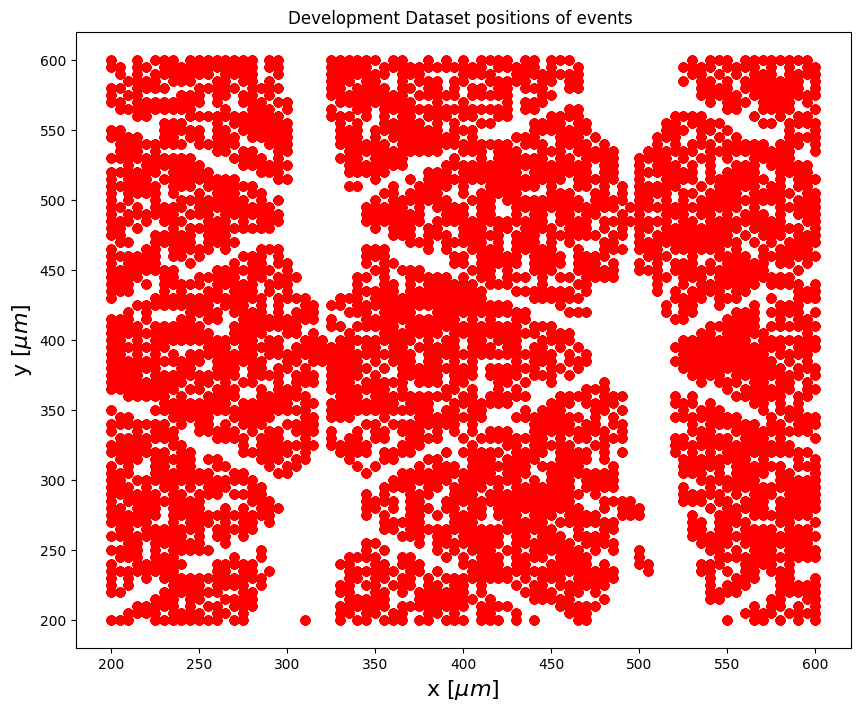

In [18]:
plt.figure(figsize=(10, 8))
plt.scatter(df['x'], df['y'], c='r', marker='o', alpha=0.25)
plt.title('Development Dataset positions of events ')
plt.xlabel('x '+(r'$[\mu m$]'),fontsize=16)
plt.ylabel('y '+(r'$[\mu m$]'),fontsize=16)
plt.show()

BarPlots Feature Analysis

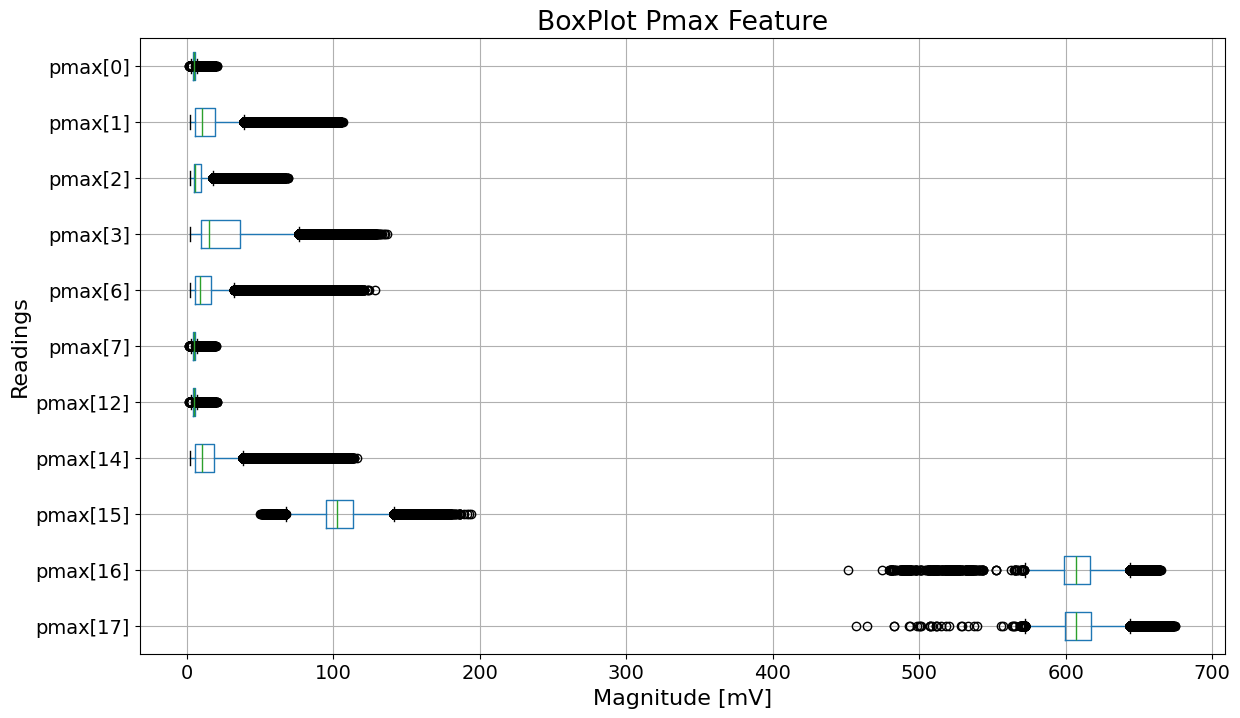

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [19]:
mpl.rcParams["font.size"] = 16
plt.figure(figsize=(14, 8))
df.boxplot(column=['pmax[17]','pmax[16]','pmax[15]','pmax[14]','pmax[12]','pmax[7]','pmax[6]','pmax[3]','pmax[2]','pmax[1]','pmax[0]'], vert=False,fontsize=14)
plt.title('BoxPlot Pmax Feature')
plt.xlabel('Magnitude [mV]',fontsize=16)
plt.ylabel('Readings',fontsize=16)
plt.show()
plt.figure(figsize=(14, 8))

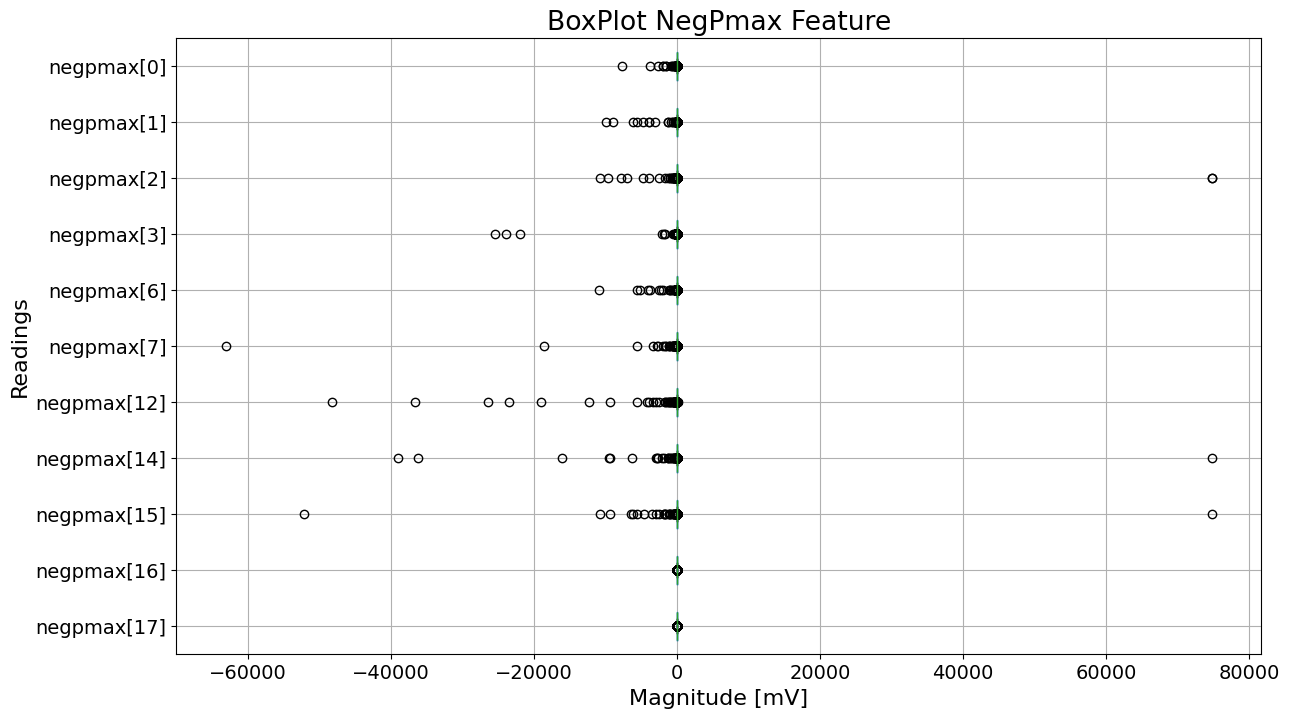

In [20]:
mpl.rcParams["font.size"] = 16
plt.figure(figsize=(14, 8))
df.boxplot(column=['negpmax[17]','negpmax[16]','negpmax[15]','negpmax[14]','negpmax[12]','negpmax[7]','negpmax[6]','negpmax[3]','negpmax[2]','negpmax[1]','negpmax[0]'], vert=False,fontsize=14)
plt.title('BoxPlot NegPmax Feature')
plt.xlabel('Magnitude [mV]',fontsize=16)
plt.ylabel('Readings',fontsize=16)
plt.show()

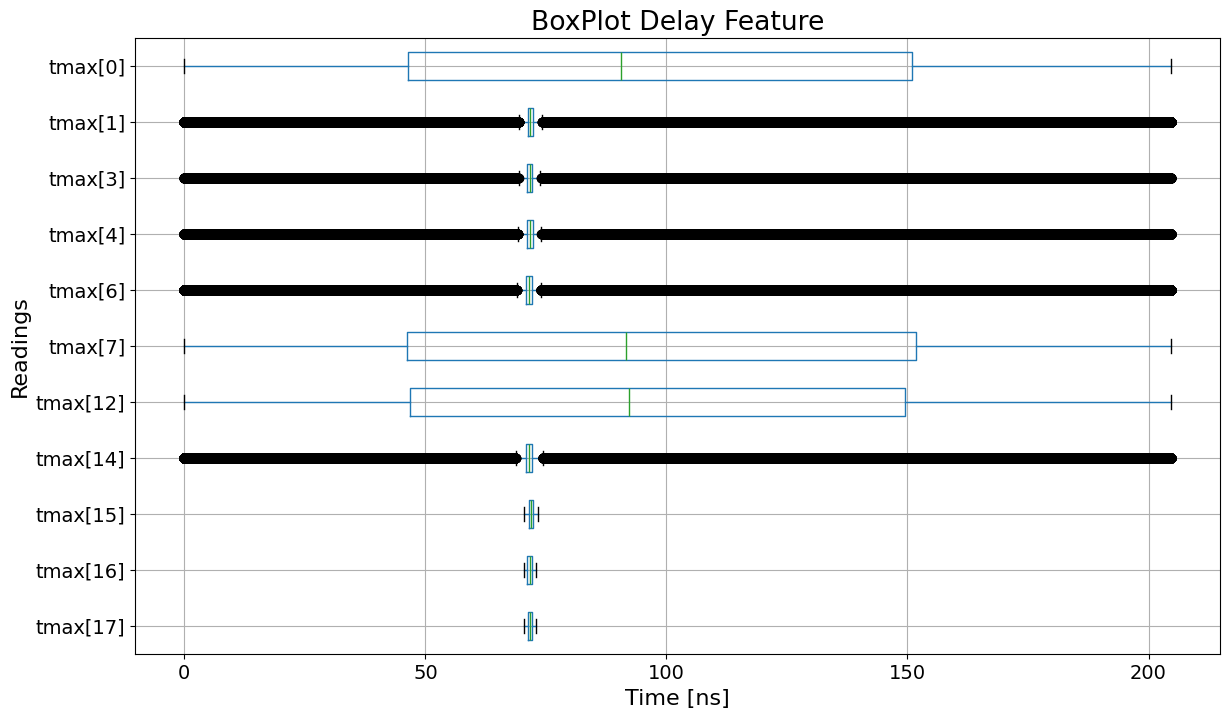

In [21]:
mpl.rcParams["font.size"] = 16
plt.figure(figsize=(14, 8))
df.boxplot(column=['tmax[17]','tmax[16]','tmax[15]','tmax[14]','tmax[12]','tmax[7]','tmax[6]','tmax[4]','tmax[3]','tmax[1]','tmax[0]'], vert=False,fontsize=14)
plt.title('BoxPlot Delay Feature')
plt.xlabel('Time [ns]',fontsize=16)
plt.ylabel('Readings',fontsize=16)
plt.show()

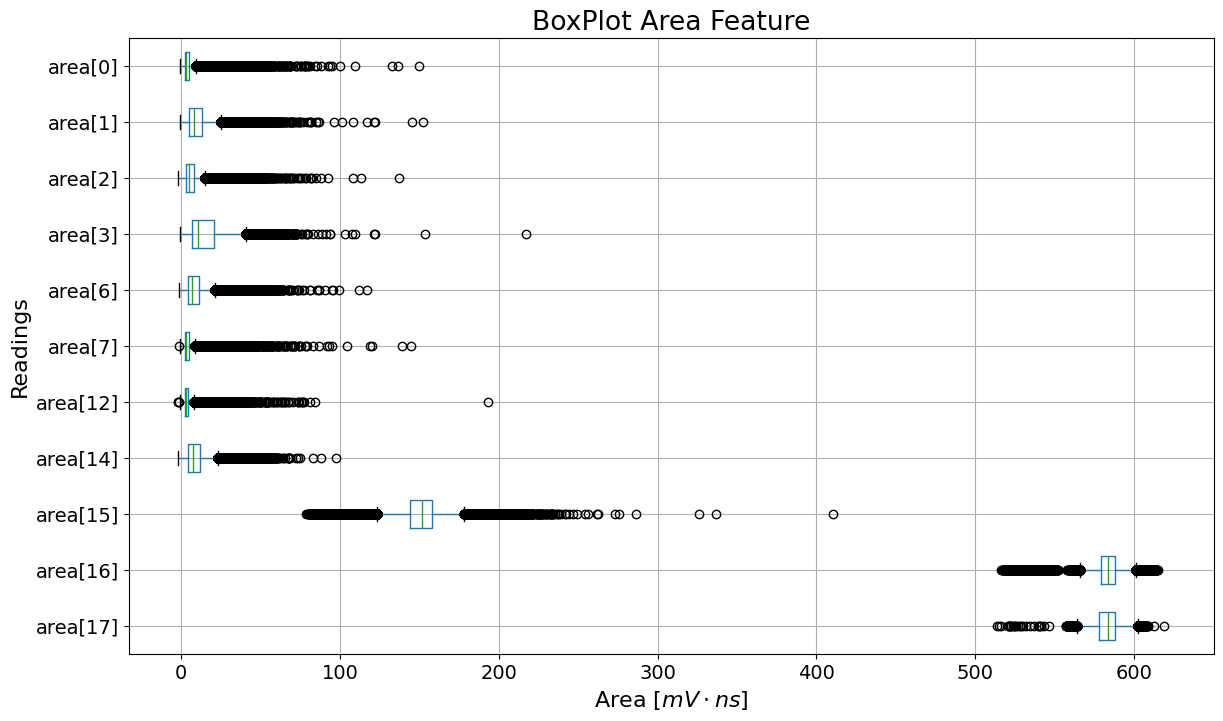

In [22]:
mpl.rcParams["font.size"] = 16
plt.figure(figsize=(14, 8))
df.boxplot(column=['area[17]','area[16]','area[15]','area[14]','area[12]','area[7]','area[6]','area[3]','area[2]','area[1]','area[0]'], vert=False,fontsize=14)
plt.title('BoxPlot Area Feature')
plt.xlabel('Area '+(r'$[mV \cdot ns] $'),fontsize=16)
plt.ylabel('Readings',fontsize=16)
plt.show()

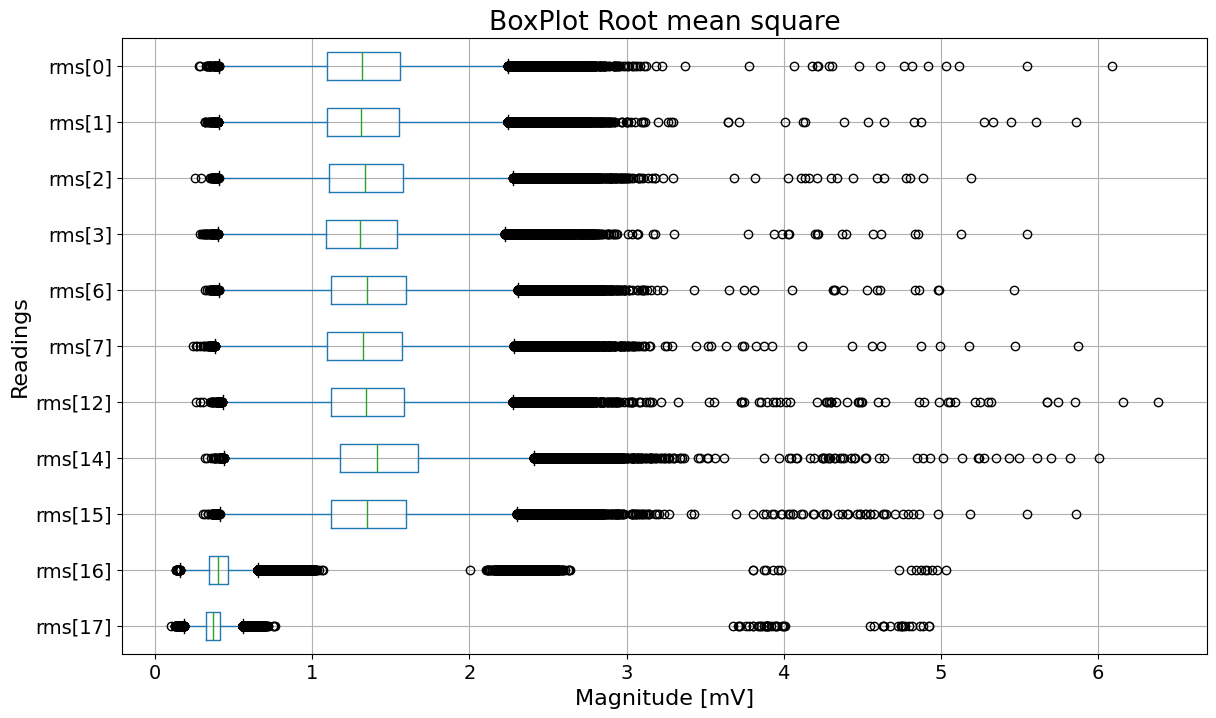

In [23]:
mpl.rcParams["font.size"] = 16
plt.figure(figsize=(14, 8))
df.boxplot(column=['rms[17]','rms[16]','rms[15]','rms[14]','rms[12]','rms[7]','rms[6]','rms[3]','rms[2]','rms[1]','rms[0]'], vert=False,fontsize=14)
plt.title('BoxPlot Root mean square')
plt.xlabel('Magnitude [mV]',fontsize=16)
plt.ylabel('Readings',fontsize=16)
plt.show()

Preprocessing features steps

In [24]:
noise_pmax = []
noise_negpmax = []
noise_area = []
noise_tmax = []
noise_rms = []
noise_vpp = []
for i in [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15]: 
    df = df[df[f'negpmax[{i}]'] < 0]
for i in range(0,18):
    df[f"vpp[{i}]"] = (df[f"pmax[{i}]"] - df[f"negpmax[{i}]"])
for i in [0, 7, 12, 16, 17]: 
    noise_pmax.append(f'pmax[{i}]')
    noise_area.append(f'area[{i}]')
    noise_area.append(f'negpmax[{i}]')
    noise_vpp.append(f'vpp[{i}]')
for i in range(0, 18): 
    noise_rms.append(f'rms[{i}]')
    noise_tmax.append(f'tmax[{i}]')
noise = noise_pmax + noise_negpmax + noise_area + noise_tmax + noise_rms+ noise_vpp
df.drop(columns=noise, inplace=True)

GridSearchCV (Random Forest Regressor and K-Neighbors Regressor)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
custom_scorer = make_scorer(custom_loss_func, greater_is_better=False)
param_grid = {'n_estimators': [50, 100, 200],
              'criterion': ['squared_error'],
              'max_features': ['sqrt', 'log2'],
              'random_state': [42],
              'n_jobs': [-1]      
    }
X = df.drop(columns=['x', 'y']).values
y = df[['x', 'y']].values
X_train_valid = X
y_train_valid = y
gs = GridSearchCV(RandomForestRegressor(), param_grid, scoring=custom_scorer, n_jobs=-1, cv=5)
gs.fit(X_train_valid, y_train_valid)
print(gs.best_score_)  
print(gs.best_estimator_) 
print(gs.best_params_)
param_grid = {'n_neighbors': [5, 7, 9],
           'weights': ['uniform', 'distance'],
           'algorithm': ['auto']    
}
gs = GridSearchCV(RandomForestRegressor(), param_grid, scoring=custom_scorer, n_jobs=-1, cv=5)
gs.fit(X_train_valid, y_train_valid)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)  

In [5]:
y_forPCA = df_forPCA[['x','y']].values
df_forPCA.drop(columns=['x','y'], inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_forPCA, y_forPCA, test_size=0.2, random_state=42,shuffle=True)

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)

PCA()

In [91]:
Pca_Xtrain = pca.transform(X_train)
mdf = np.sum(np.cumsum(pca.explained_variance_ratio_) < .90) + 1
pca_m = PCA(n_components=mdf)
pca_m.fit(X_train)
X_train = pca_m.transform(X_train)
X_test = pca_m.transform(X_test)
X_train = np.where(np.isinf(X_train), np.finfo(np.float32).max, X_train)

reg = RandomForestRegressor(random_state=42, n_jobs=-1)
reg.fit(X_train, y_train)   
y_pred = reg.predict(X_test)
print(custom_loss_func(y_test,y_pred))

13.306617634364708


In [8]:
reg = KNeighborsRegressor(n_jobs=-1)
reg.fit(X_train, y_train)   
y_pred = reg.predict(X_test)
print(custom_loss_func(y_test,y_pred))

17.047730122526502


In [25]:
df_eval = pd.read_csv('evaluation.csv', sep=',')
for i in range(0,18):
    df_eval[f"vpp[{i}]"] = (df_eval[f"pmax[{i}]"] - df_eval[f"negpmax[{i}]"])
df_eval.drop(columns=noise, inplace=True)

X_train = df.drop(columns=['x', 'y']).values
y_trainX = df[['x']].values
y_trainY = df[['y']].values
y_train = df[['x','y']].values
X_test = df_eval.drop(columns='Id').values

Random Forest Regressor

In [26]:
reg = RandomForestRegressor(n_estimators = 200, criterion='squared_error', max_features='sqrt', random_state=42, n_jobs=-1)
reg.fit(X_train, y_train)                    
y_pred = reg.predict(X_test) 
header = ['Id', 'Predicted']
with open("submission.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i in df_eval['Id']:
         writer.writerow([i, ''.join((str(round(y_pred[i, 0],2)), '|', str(round(y_pred[i, 1],2))))])  


Coordinates Development Events Scatter

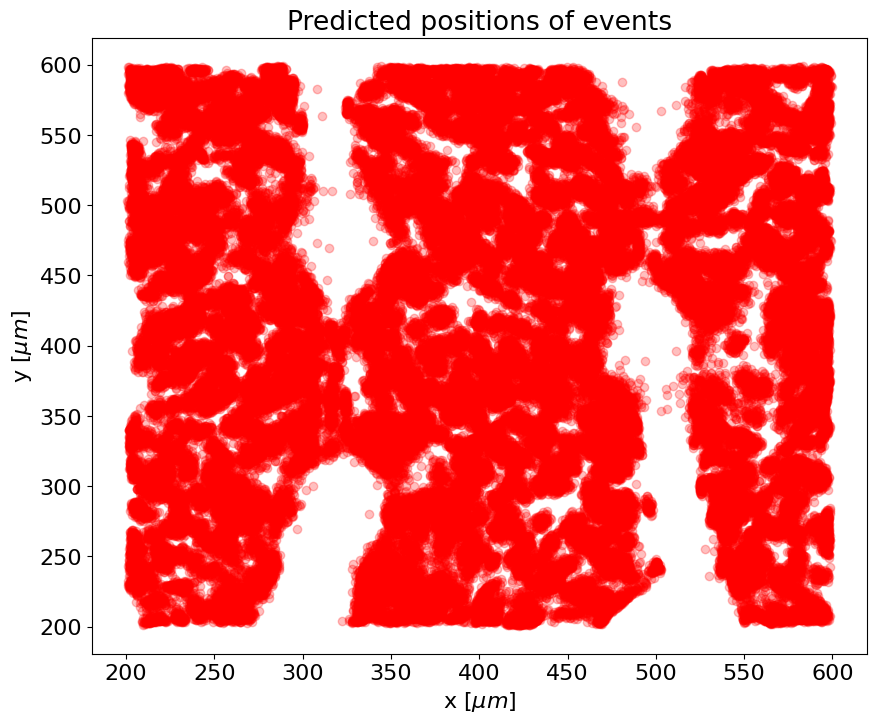

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(y_pred[:,0], y_pred[:,1], c='r', marker='o', alpha=0.25)
plt.title('Predicted positions of events')
plt.xlabel('x '+(r'$[\mu m$]'),fontsize=16)
plt.ylabel('y '+(r'$[\mu m$]'),fontsize=16)
plt.show()